In [56]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [57]:
df=pd.read_csv("telcochurn.csv")
df.shape

(7043, 21)

In [58]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [59]:
df.drop('customerID',axis='columns',inplace=True)

In [60]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [61]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [62]:
pd.to_numeric(df.TotalCharges,errors='coerce')

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.50
7039,7362.90
7040,346.45
7041,306.60


In [63]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [65]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [66]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

<ipython-input-66-973151263>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [67]:
tenure_churn_no=df1[df1.Churn=='No'].tenure

In [68]:
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

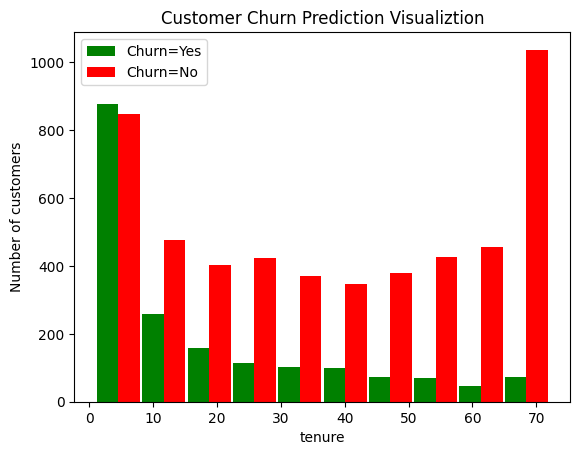

In [69]:
plt.xlabel("tenure")
plt.ylabel("Number of customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([tenure_churn_yes,tenure_churn_no],rwidth=0.95,color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [70]:
def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes=='object':
      print(f'{column} : {df[column].unique()}')

In [71]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [72]:
df1.replace('No internet service','No',inplace=True)

In [73]:
df1.replace('No phone service','No',inplace=True)

<ipython-input-73-628100714>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [74]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [75]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [76]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [77]:
df1=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'],dtype=int)

In [78]:
print_unique_col_values(df1)

In [79]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [80]:
df1.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


In [81]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1[cols_to_scale]=scaler.fit_transform(df1[cols_to_scale])

In [82]:
df1.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2845,1,0,0,0,0.140845,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
1358,0,0,0,0,0.126761,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
5791,0,0,1,0,0.873239,1,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0


In [83]:
X=df1.drop('Churn',axis='columns')
y=df1['Churn']

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [85]:
X_train.shape

(5625, 26)

In [91]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7216 - loss: 0.5486
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7924 - loss: 0.4226
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8018 - loss: 0.4155
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8017 - loss: 0.4081
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8147 - loss: 0.4136
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8055 - loss: 0.4013
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8129 - loss: 0.4057
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8122 - loss: 0.4061
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8016 - loss: 0.4113
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8037 - loss: 0.4159
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8128 - loss: 0.4021
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

In [92]:
model.evaluate(X_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7905 - loss: 0.4675


[0.4844318628311157, 0.7725657224655151]

In [93]:
yp=model.predict(X_test)
yp[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[0.27516952],
       [0.35952455],
       [0.00200475],
       [0.7022479 ],
       [0.7522983 ]], dtype=float32)

In [94]:
y_test[:5]

,Churn
2660,0
744,0
5579,1
64,1
3287,1


In [95]:
y_pred=[]
for element in yp:
  if element>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [96]:
y_test[:10]

,Churn
2660,0
744,0
5579,1
64,1
3287,1
816,1
2670,0
5920,0
1023,0
6087,0


In [97]:
y_pred[:10]

[0, 0, 0, 1, 1, 1, 0, 0, 0, 0]

In [98]:
from sklearn.metrics import confusion_matrix, classification_report
print("classification report : \n",classification_report(y_test,y_pred))

classification report : 
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       999
           1       0.65      0.47      0.55       408

    accuracy                           0.77      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.76      0.77      0.76      1407



Text(95.72222222222221, 0.5, 'Truth')

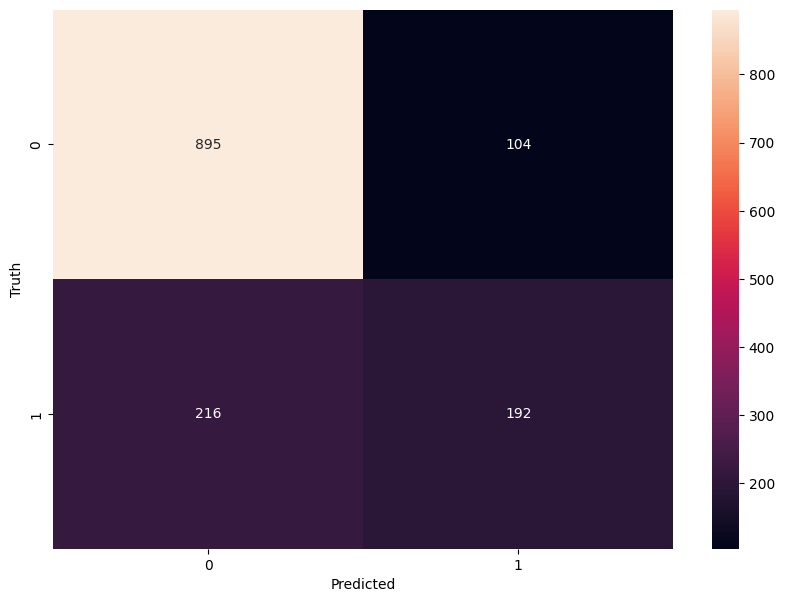

In [100]:
import seaborn as sns
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')